In [9]:
# packages

import numpy as np
import math as m
import pandas as pd
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.optimize import fsolve
from sympy import symbols, Eq, solve, I, cos, exp, pi
import os
os.chdir('C:\\Users\\nicol\\Desktop\\pythonfiles\\Aeroelasticity')  # change this to your directory


In [2]:
# functions

def compute_matrices(theta_blade, theta_yaw, theta_tilt):

    a1 = (  [1,0,0],
            [0, np.cos(theta_yaw), np.sin(theta_yaw)],
            [0, -np.sin(theta_yaw), np.cos(theta_yaw)])
    a2 = (  [np.cos(theta_tilt), 0, -np.sin(theta_tilt)],
            [0, 1, 0],
            [np.sin(theta_tilt), 0, np.cos(theta_tilt)])
    a12 = np.dot(a1, a2)
    a21 = np.transpose(a12)
    
    a23 = ( [np.cos(theta_blade), np.sin(theta_blade), 0],
            [-np.sin(theta_blade), np.cos(theta_blade), 0],
            [0, 0, 1])
    a34 = ( [np.cos(theta_cone), 0, -np.sin(theta_cone)],
            [0, 1, 0],
            [np.sin(theta_cone), 0, np.cos(theta_cone)])
    a14 = np.dot(np.dot(a34,a23), a12)
    a41 = np.transpose(a14)

    return a21, a23, a41 

def compute_position(a21, a41, H, Ls, radius):
        
    rt = [H,0,0]
    rs = np.dot(a21, [0,0,-Ls])
    rb = np.dot(a41, [radius,0,0])
    position = rt + rs + rb
    return position


Text(0.5, 1.0, 'blade 1 - y position')

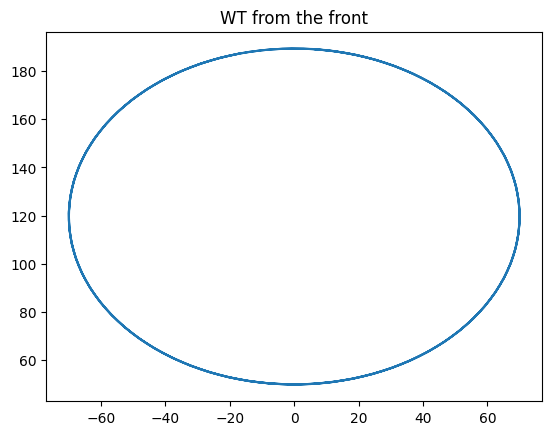

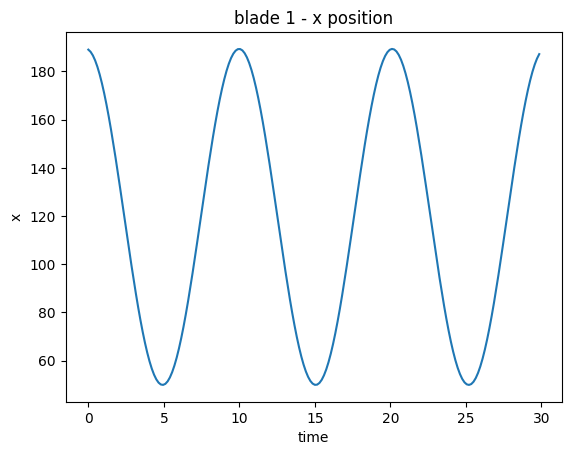

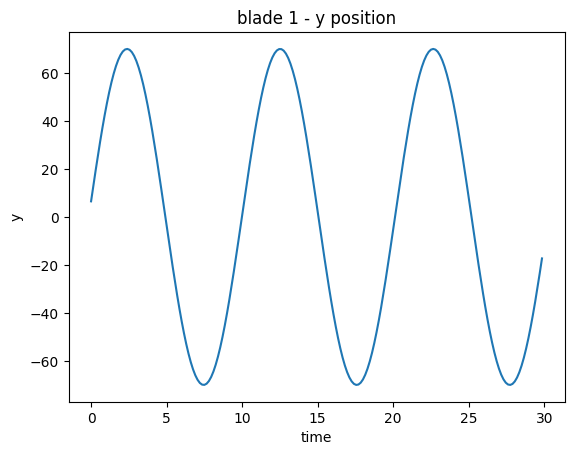

In [59]:
# ex 1

H = 119
Ls = 7.1
R = 89.15
theta_tilt = np.deg2rad(-5)

num =200
deltat = 0.15

omega = 0.62
radius = 70
theta_cone = 0
theta_yaw = 0
theta_pitch = 0

theta_blade1 = 0

r_1array = []
r_2array = []
r_3array = []
time_array = []

for n in range(0,num):
    time = n*deltat
    time_array.append(time)

    theta_blade1_new = theta_blade1 + omega*deltat
    theta_blade2_new = theta_blade1_new + 2*np.pi/3
    theta_blade3_new = theta_blade1_new + 4*np.pi/3

    a21_1, a23_1, a41_1 = compute_matrices(theta_blade1_new, theta_yaw, theta_tilt)
    a21_2, a23_2, a41_2 = compute_matrices(theta_blade2_new, theta_yaw, theta_tilt)
    a21_3, a23_3, a41_3 = compute_matrices(theta_blade3_new, theta_yaw, theta_tilt)

    r_1 = compute_position(a21_1, a41_1, H, Ls, radius)
    r_2 = compute_position(a21_2, a41_2, H, Ls, radius)
    r_3 = compute_position(a21_3, a41_3, H, Ls, radius)

    r_1array.append(r_1)
    r_2array.append(r_2)
    r_3array.append(r_3)

    theta_blade1 = theta_blade1_new


rx_1 = [arr[0] for arr in r_1array]
ry_1 = [arr[1] for arr in r_1array]
rz_1 = [arr[2] for arr in r_1array]


plt.figure(1)
plt.plot(ry_1, rx_1)
plt.title('WT from the front')

plt.figure(2)
plt.plot(time_array, rx_1)
plt.xlabel('time')
plt.ylabel('x')
plt.title('blade 1 - x position')

plt.figure(3)
plt.plot(time_array, ry_1)
plt.xlabel('time')
plt.ylabel('y')
plt.title('blade 1 - y position')


Text(0.5, 1.0, 'blade 1 - z position')

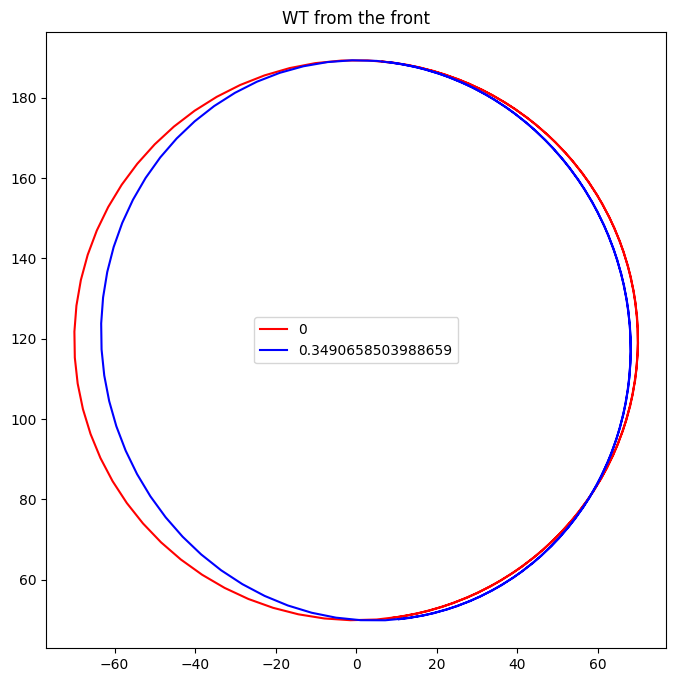

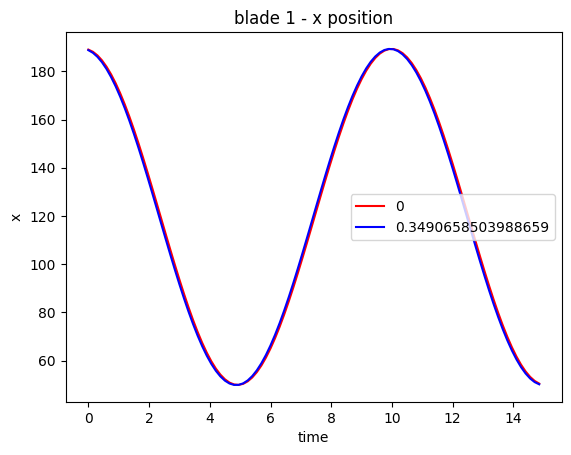

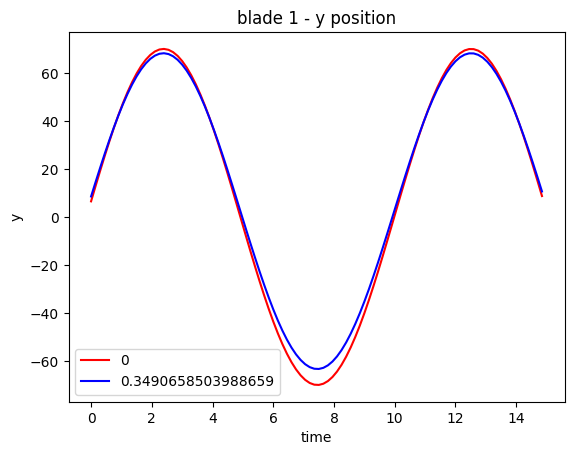

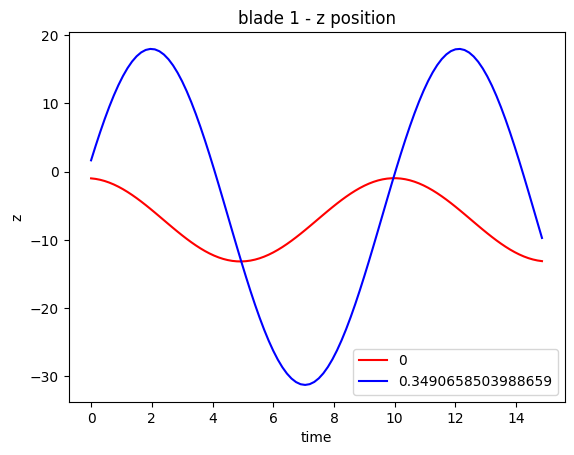

In [12]:
# ex 2

H = 119
Ls = 7.1
R = 89.15
theta_tilt = np.deg2rad(-5)
nu = 0.2
V0 = 10

num =200
deltat = 0.15

omega = 0.62
radius = 70
theta_cone = 0
theta_pitch = 0

theta_yaw_a = 0
theta_yaw_b = np.deg2rad(20)


def compute_position_yaw(num, theta_yaw):
    time_array = []
    r_1array = []
    r_2array = []
    r_3array = []

    theta_blade1 = 0

    for n in range(0,num):
        time = n*deltat
        time_array.append(time)

        theta_blade1_new = theta_blade1 + omega*deltat
        theta_blade2_new = theta_blade1_new + 2*np.pi/3
        theta_blade3_new = theta_blade1_new + 4*np.pi/3

        a21_1, a23_1, a41_1 = compute_matrices(theta_blade1_new, theta_yaw, theta_tilt)
        a21_2, a23_2, a41_2 = compute_matrices(theta_blade2_new, theta_yaw, theta_tilt)
        a21_3, a23_3, a41_3 = compute_matrices(theta_blade3_new, theta_yaw, theta_tilt)

        r_1 = compute_position(a21_1, a41_1, H, Ls, radius)
        r_2 = compute_position(a21_2, a41_2, H, Ls, radius)
        r_3 = compute_position(a21_3, a41_3, H, Ls, radius)

        r_1array.append(r_1)
        r_2array.append(r_2)
        r_3array.append(r_3)

        theta_blade1 = theta_blade1_new
    
    rx_1 = [arr[0] for arr in r_1array]
    ry_1 = [arr[1] for arr in r_1array]
    rz_1 = [arr[2] for arr in r_1array]

    return rx_1, ry_1, rz_1, time_array

rx_1_a, ry_1_a, rz_1_a, time_array = compute_position_yaw(num=100, theta_yaw=theta_yaw_a)
rx_1_b, ry_1_b, rz_1_b, time_array = compute_position_yaw(num=100, theta_yaw=theta_yaw_b)


plt.figure(1,figsize=(8,8))
plt.plot(ry_1_a, rx_1_a, color='r', label=theta_yaw_a)
plt.plot(ry_1_b, rx_1_b, color='b', label=theta_yaw_b)
plt.legend()
plt.title('WT from the front')

plt.figure(2)
plt.plot(time_array, rx_1_a, color='r', label=theta_yaw_a)
plt.plot(time_array, rx_1_b, color='b', label=theta_yaw_b)
plt.legend()
plt.xlabel('time')
plt.ylabel('x')
plt.title('blade 1 - x position')

plt.figure(3)
plt.plot(time_array, ry_1_a, color='r', label=theta_yaw_a)
plt.plot(time_array, ry_1_b, color='b', label=theta_yaw_b)
plt.legend()
plt.xlabel('time')
plt.ylabel('y')
plt.title('blade 1 - y position')

plt.figure(4)
plt.plot(time_array, rz_1_a, color='r', label=theta_yaw_a)
plt.plot(time_array, rz_1_b, color='b', label=theta_yaw_b)
plt.legend()
plt.xlabel('time')
plt.ylabel('z')
plt.title('blade 1 - z position')


Text(0.5, 1.0, 'blade 1 - z velocity')

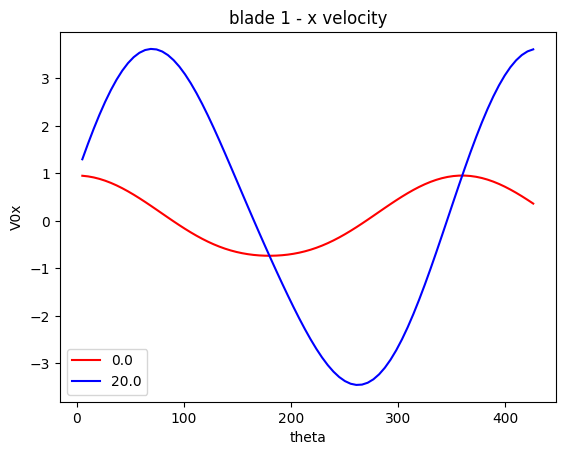

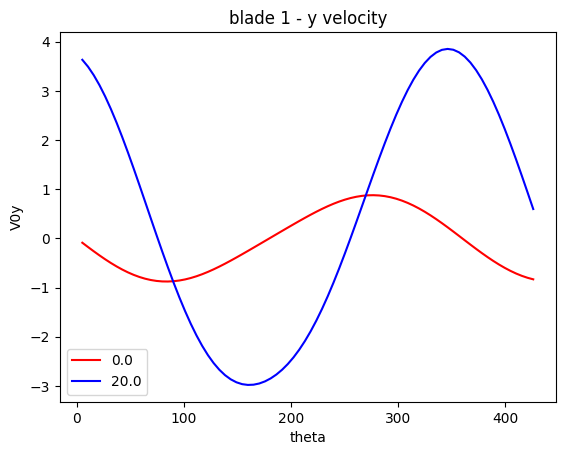

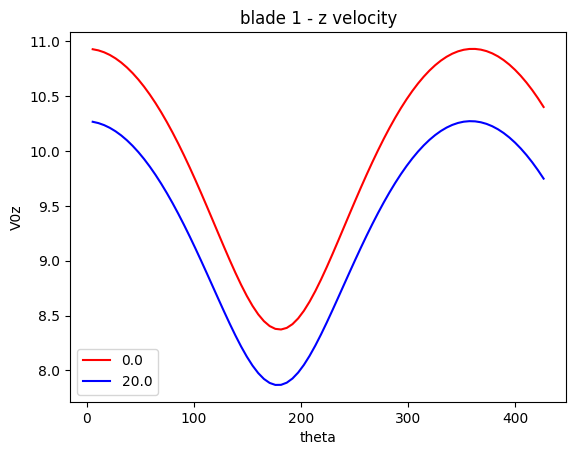

In [3]:
# ex 3

H = 119
Ls = 7.1
R = 89.15
theta_tilt = np.deg2rad(-5)
nu = 0.2
V0 = 10

num =200
deltat = 0.15

omega = 0.62
radius = 70
theta_cone = 0
theta_pitch = 0

theta_yaw_a = 0
theta_yaw_b = np.deg2rad(20)


def compute_velocity_shear(num, theta_yaw):
    time_array = []
    theta_blade1_array = []
    V0_1array = []

    theta_blade1 = 0

    for n in range(0,num):
        time = n*deltat
        time_array.append(time)

        theta_blade1_new = theta_blade1 + omega*deltat

        theta_blade1_array.append(theta_blade1_new)

        a21_1, a23_1, a41_1 = compute_matrices(theta_blade1_new, theta_yaw, theta_tilt)

        r_1 = compute_position(a21_1, a41_1, H, Ls, radius)

        a14_1 = np.transpose(a41_1)

        V0_1_1 = [0, 0, V0*(r_1[0] / H)**nu]
        V0_4_1 = np.dot(a14_1, V0_1_1)

        V0_1array.append(V0_4_1)

        theta_blade1 = theta_blade1_new
    
    V0x_1 = [arr[0] for arr in V0_1array]
    V0y_1 = [arr[1] for arr in V0_1array]
    V0z_1 = [arr[2] for arr in V0_1array]

    return V0x_1, V0y_1, V0z_1, time_array, theta_blade1_array

V0x_1_a, V0y_1_a, V0z_1_a, time_array, theta_blade1_array = compute_velocity_shear(num=80, theta_yaw=theta_yaw_a)
V0x_1_b, V0y_1_b, V0z_1_b, time_array, theta_blade1_array = compute_velocity_shear(num=80, theta_yaw=theta_yaw_b)


plt.figure(1)
plt.plot(np.rad2deg(theta_blade1_array), V0x_1_a, color='r', label=np.rad2deg(theta_yaw_a))
plt.plot(np.rad2deg(theta_blade1_array), V0x_1_b, color='b', label=np.rad2deg(theta_yaw_b))
plt.legend()
plt.xlabel('theta')
plt.ylabel('V0x')
plt.title('blade 1 - x velocity')

plt.figure(2)
plt.plot(np.rad2deg(theta_blade1_array), V0y_1_a, color='r', label=np.rad2deg(theta_yaw_a))
plt.plot(np.rad2deg(theta_blade1_array), V0y_1_b, color='b', label=np.rad2deg(theta_yaw_b))
plt.legend()
plt.xlabel('theta')
plt.ylabel('V0y')
plt.title('blade 1 - y velocity')

plt.figure(3)
plt.plot(np.rad2deg(theta_blade1_array), V0z_1_a, color='r', label=np.rad2deg(theta_yaw_a))
plt.plot(np.rad2deg(theta_blade1_array), V0z_1_b, color='b', label=np.rad2deg(theta_yaw_b))
plt.legend()
plt.xlabel('theta')
plt.ylabel('V0z')
plt.title('blade 1 - z velocity')


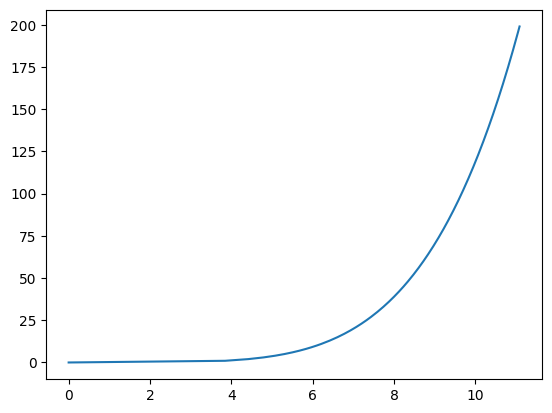

In [25]:
# vwlocity profile

x = np.arange(start=0, stop=200)
V0x = V0*(x / H)**nu

plt.plot(V0x,x)


Text(0.5, 1.0, 'blade 1 - z velocity')

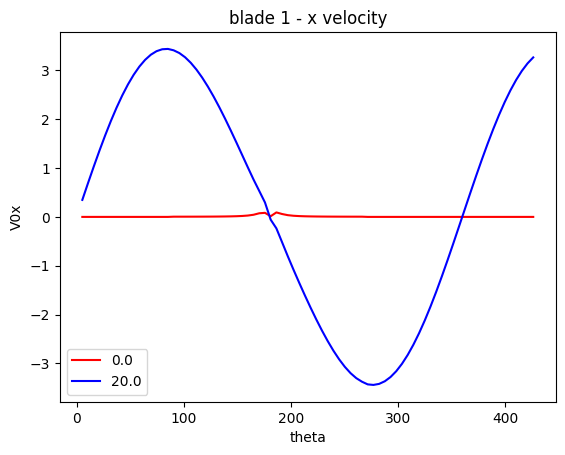

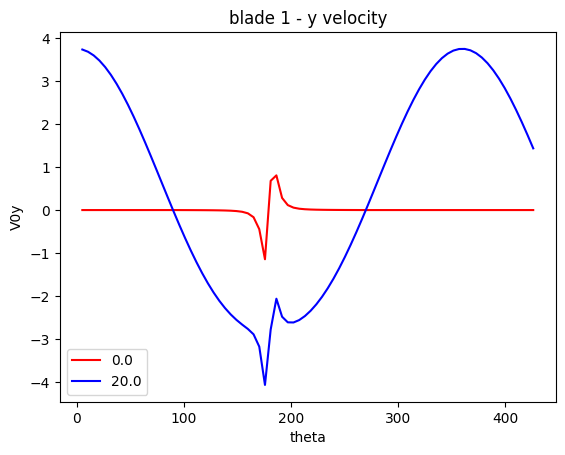

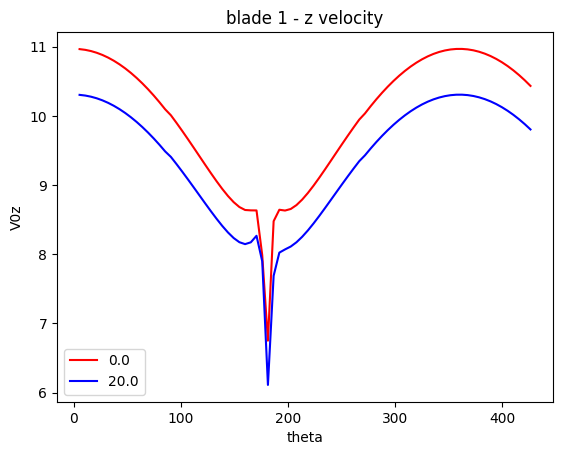

In [8]:
# ex 4 and 5 - most complete version

H = 119
Ls = 7.1
R = 89.15
theta_tilt = np.deg2rad(0)
nu = 0.2
V0 = 10

num =80
deltat = 0.15

omega = 0.62
radius = 70

a0 = 3.32

theta_yaw_a = 0
theta_yaw_b = np.deg2rad(20)

def compute_tower_radius(x):
    if x <= H:
        a = a0
    else:
        a = 0
    return a


def compute_velocity_shear_tower(num, theta_yaw):
    time_array = []
    theta_blade1_array = []
    V0_1array = []

    theta_blade1 = 0

    for n in range(0,num):

        # time
        time = n*deltat
        time_array.append(time)

        # angles
        theta_blade1_new = theta_blade1 + omega*deltat
        theta_blade1_array.append(theta_blade1_new)

        a21_1, a23_1, a41_1 = compute_matrices(theta_blade1_new, theta_yaw, theta_tilt)

        # position
        r_1 = compute_position(a21_1, a41_1, H, Ls, radius)

        # shear
        V0x = V0*(r_1[0] / H)**nu

        # tower
        y = r_1[1]
        z = r_1[2]
        r = np.sqrt(y**2 + z**2)
        a = compute_tower_radius(r_1[0])

        Vr =     z/r * V0x * (1 - (a/r)**2)
        Vtheta = y/r * V0x * (1 + (a/r)**2)

        Vx = 0
        Vz =  z/r * Vr + y/r * Vtheta
        Vy =  y/r * Vr - z/r * Vtheta

        # total velocity
        a14_1 = np.transpose(a41_1)
        V0_1_1 = [Vx, Vy, Vz]
        V0_4_1 = np.dot(a14_1, V0_1_1)  
        V0_1array.append(V0_4_1)

        theta_blade1 = theta_blade1_new
    
    V0x_1 = [arr[0] for arr in V0_1array]
    V0y_1 = [arr[1] for arr in V0_1array]
    V0z_1 = [arr[2] for arr in V0_1array]

    return V0x_1, V0y_1, V0z_1, time_array, theta_blade1_array

V0x_1_a, V0y_1_a, V0z_1_a, time_array, theta_blade1_array = compute_velocity_shear_tower(num=num, theta_yaw=theta_yaw_a)
V0x_1_b, V0y_1_b, V0z_1_b, time_array, theta_blade1_array = compute_velocity_shear_tower(num=num, theta_yaw=theta_yaw_b)


plt.figure(1)
plt.plot(np.rad2deg(theta_blade1_array), V0x_1_a, color='r', label=np.rad2deg(theta_yaw_a))
plt.plot(np.rad2deg(theta_blade1_array), V0x_1_b, color='b', label=np.rad2deg(theta_yaw_b))
plt.legend()
plt.xlabel('theta')
plt.ylabel('V0x')
plt.title('blade 1 - x velocity')

plt.figure(2)
plt.plot(np.rad2deg(theta_blade1_array), V0y_1_a, color='r', label=np.rad2deg(theta_yaw_a))
plt.plot(np.rad2deg(theta_blade1_array), V0y_1_b, color='b', label=np.rad2deg(theta_yaw_b))
plt.legend()
plt.xlabel('theta')
plt.ylabel('V0y')
plt.title('blade 1 - y velocity')

plt.figure(3)
plt.plot(np.rad2deg(theta_blade1_array), V0z_1_a, color='r', label=np.rad2deg(theta_yaw_a))
plt.plot(np.rad2deg(theta_blade1_array), V0z_1_b, color='b', label=np.rad2deg(theta_yaw_b))
plt.legend()
plt.xlabel('theta')
plt.ylabel('V0z')
plt.title('blade 1 - z velocity')
